In [165]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple

$$
    \left\{
    \begin{array}\\
    y = 4 t ^ 2 + 1 \\
    x = 3 t
    \end{array}
    \right.
$$
$$ \left\{
    \begin{array}\\
    t = \frac{x}{3}\\
    y = 4 \frac{x^2}{9} + 1
    \end{array}
    \right.
$$


In [166]:
# Choose the step for dt
dt = 0.2

In [167]:
t_array = np.arange(-5, 5, dt)

x_array = 3 * t_array
y_array = 4 * t_array ** 2 + 1

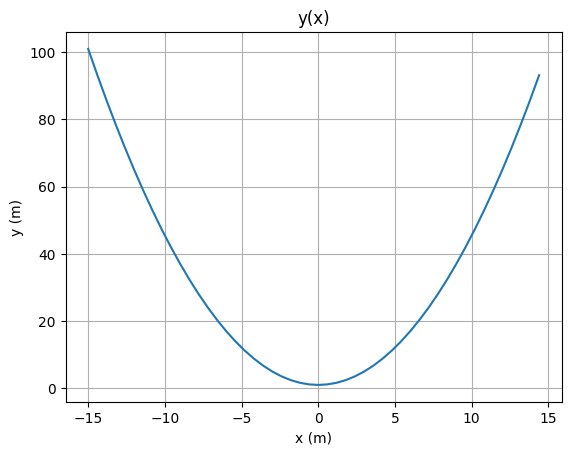

In [168]:
# Plot creation

fig, ax = plt.subplots()
ax.plot(x_array, y_array)

ax.set(xlabel='x (m)', ylabel='y (m)',
       title='y(x)')
ax.grid()
plt.show()  # Show the plot



$$     \vec{V} = \frac {d x \vec{i} + dy \vec{j}}{dt} \\
       \vec{V} = 3 \vec{i} + 8t \vec{j}
$$
Using the formula $|\vec{v}| = \sqrt{v_x^2 + v_y^2}$ we can calculate speed of the particle.

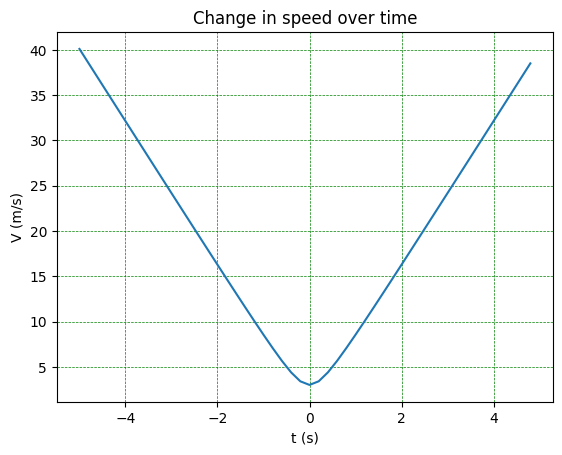

In [169]:
v_array = np.sqrt(3 ** 2 + (8 * t_array) ** 2)
v_matrix = np.array([(3, 8 * t) for t in t_array])
tau = np.divide(v_matrix, np.linalg.norm(v_matrix))
fig, ax = plt.subplots()
ax.plot(t_array, v_array)

ax.set(xlabel='t (s)', ylabel='V (m/s)',
       title='Change in speed over time')
ax.grid(color='green', linestyle='--', linewidth=0.5)
plt.show()  # Show the plot

$$\vec{a} = \vec{a_n} + \vec{a_\tau}$$$$\vec{a} = \frac{dV}{dt} = \frac{3\vec{i} + 8t\vec{j}}{dt} = 8\vec{j}$$

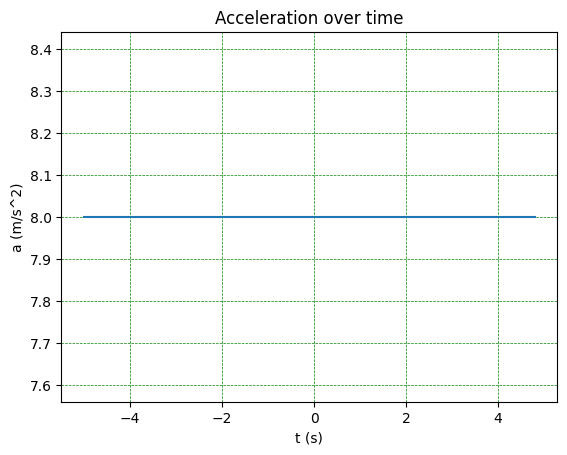

In [170]:
a_module_array = np.array(t_array)
a_module_array.fill(8)
fig, ax = plt.subplots()
ax.plot(t_array, a_module_array)

ax.set(xlabel='t (s)', ylabel='a (m/s^2)',
       title='Acceleration over time')
ax.grid(color='green', linestyle='--', linewidth=0.5)
plt.show()  # Show the plot

$$a_\tau = \frac{\vec{a}*\vec{v}}{|v|}$$
$${a_n} = \frac{\vec{a}\times \vec{v}}{|v|}$$

In [171]:
a_matrix = np.array([(0, 8) for t in t_array])


In [172]:
a_t_matrix = np.empty(shape=a_matrix.shape)
for i in range(0, t_array.size):
    dot = np.dot(a_matrix[i], v_matrix[i])
    norm = np.linalg.norm(v_matrix[i])
    new_a_t = dot / norm
    print(new_a_t)
    # print(cross, norm, new_a_t)
    a_t_matrix[i] = np.multiply(new_a_t, tau[i])

print(a_t_matrix)

-1.9425001421544026
-1.8648001364682263
-1.7871001307820502
-1.7094001250958741
-1.6317001194096978
-1.5540001137235218
-1.4763001080373455
-1.3986001023511694
-1.320900096664993
-1.243200090978817
-1.165500085292641
-1.0878000796064646
-1.0101000739202886
-0.9324000682341124
-0.8547000625479362
-0.77700005686176
-0.6993000511755838
-0.6216000454894076
-0.5439000398032314
-0.4662000341170553
-0.3885000284308791
-0.310800022744703
-0.2331000170585268
-0.15540001137235063
-0.07770000568617444
1.725286706525966e-15
0.0777000056861779
0.15540001137235407
0.23310001705853023
0.3108000227447064
0.3885000284308826
0.46620003411705874
0.543900039803235
0.6216000454894111
0.6993000511755872
0.7770000568617634
0.8547000625479396
0.9324000682341158
1.0101000739202919
1.0878000796064682
1.1655000852926443
1.2432000909788201
1.3209000966649966
1.3986001023511732
1.476300108037349
1.5540001137235249
1.6317001194097014
1.709400125095878
1.7871001307820538
1.8648001364682294
[[-3.53747513e-02  4.71663

In [173]:
a_n_matrix = np.empty(shape=a_matrix.shape)

for i in range(0, t_array.size):
    new_a_n = np.cross(a_matrix[i], v_matrix[i]) / np.linalg.norm(v_matrix[i])
    print(new_a_n)
    a_n_matrix[i] = a_matrix[i] - a_t_matrix[i]
print(a_n_matrix)

-0.5983195859330738
-0.6231013383432773
-0.6500175484536798
-0.6793553334692896
-0.7114555037960443
-0.7467256695444663
-0.7856573621349451
-0.8288486740756484
-0.8770345945505572
-0.9311282507662617
-0.9922778767136683
-1.061946902654868
-1.1420287602944752
-1.235015042188878
-1.3442477945923554
-1.4743082804014849
-1.6316340328960108
-1.82553058231463
-2.0698886817926723
-2.3861999450875806
-2.8089875327071425
-3.3954710098457697
-4.23999152002546
-5.471529031050669
-7.058823529411798
-8.0
-7.058823529411729
-5.471529031050603
-4.239991520025415
-3.3954710098457386
-2.8089875327071203
-2.3861999450875646
-2.0698886817926603
-1.8255305823146204
-1.6316340328960033
-1.4743082804014784
-1.34424779459235
-1.2350150421888735
-1.1420287602944714
-1.0619469026548647
-0.9922778767136654
-0.9311282507662595
-0.8770345945505549
-0.8288486740756462
-0.7856573621349433
-0.7467256695444648
-0.7114555037960428
-0.679355333469288
-0.6500175484536785
-0.6231013383432762
[[ 3.53747513e-02  7.52833665

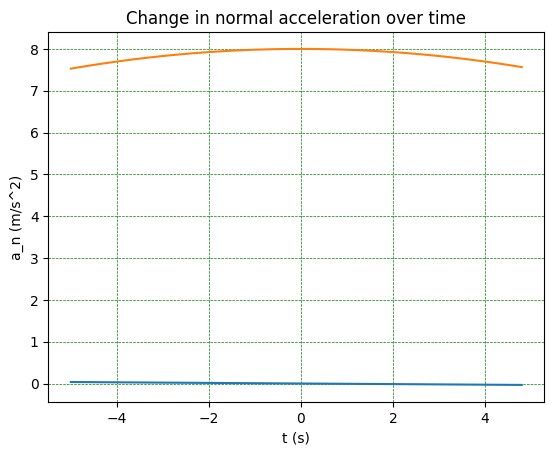

In [174]:
fig, ax = plt.subplots()
ax.plot(t_array, a_n_matrix)

ax.set(xlabel='t (s)', ylabel='a_n (m/s^2)',
       title='Change in normal acceleration over time')
ax.grid(color='green', linestyle='--', linewidth=0.5)
plt.show()  # Show the plot

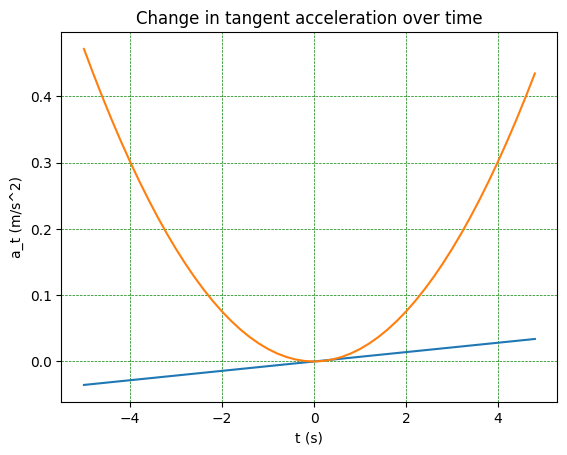

In [175]:
fig, ax = plt.subplots()
ax.plot(t_array, a_t_matrix)

ax.set(xlabel='t (s)', ylabel='a_t (m/s^2)',
       title='Change in tangent acceleration over time')
ax.grid(color='green', linestyle='--', linewidth=0.5)
plt.show()  # Show the plot

$$\vec{a} = \ddot {\sigma}\tau + \dot{\sigma}^2 k \vec{n} = \vec{a_\tau} + \vec{a_n}$$
$$\vec{a_n} = \dot{\sigma}^2 k \vec{n} = |\vec{v}|^2k\vec{n}$$


$$ k= \frac{|a_n|}{|\vec{v}|^2}$$

In [176]:
k_array = np.empty(shape=t_array.shape)

for i in range(0, t_array.size):
    k_array[i] = np.linalg.norm(a_n_matrix[i]) / np.linalg.norm(v_array[i])
print(k_array)

[0.18768337 0.19641689 0.20586202 0.21611446 0.22728786 0.23951809
 0.25296904 0.26784008 0.28437628 0.30288203 0.32374016 0.34743856
 0.37460845 0.40608051 0.44296893 0.48680102 0.53972296 0.60483705
 0.68677421 0.79269927 0.93412138 1.13011567 1.4121308  1.82315493
 2.35271925 2.66666667 2.35271925 1.82315493 1.4121308  1.13011567
 0.93412138 0.79269927 0.68677421 0.60483705 0.53972296 0.48680102
 0.44296893 0.40608051 0.37460845 0.34743856 0.32374016 0.30288203
 0.28437628 0.26784008 0.25296904 0.23951809 0.22728786 0.21611446
 0.20586202 0.19641689]


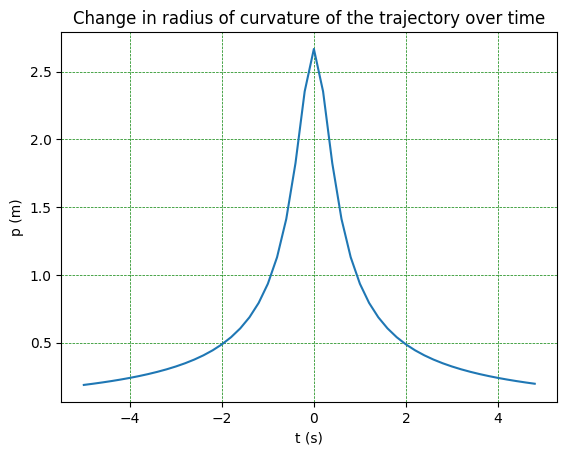

In [177]:
fig, ax = plt.subplots()
ax.plot(t_array, k_array)

ax.set(xlabel='t (s)', ylabel='p (m)',
       title='Change in radius of curvature of the trajectory over time')
ax.grid(color='green', linestyle='--', linewidth=0.5)
plt.show()  # Show the plot

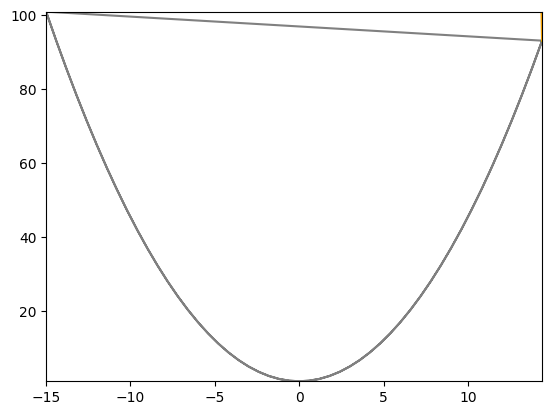

In [178]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'gray')
v_ln, = plt.plot([], [], 'b')
a_ln, = plt.plot([], [], 'g')
a_t_ln, = plt.plot([], [], 'y')
a_n_ln, = plt.plot([], [], 'orange')

def init():
    ax.set_xlim(min(x_array), max(x_array))
    ax.set_ylim(min(y_array), max(y_array))
    return ln, v_ln, a_ln, a_t_ln, a_n_ln


def draw_velocity(frame):
    v_ln.set_data([v_matrix[frame][0] + xdata[frame], xdata[frame]],
                  [v_matrix[frame][1] + ydata[frame], ydata[frame]])


def draw_acc(frame):
    a_ln.set_data([a_matrix[frame][0] + xdata[frame], xdata[frame]],
                  [a_matrix[frame][1] + ydata[frame], ydata[frame]])


def draw_acc_t(frame):
    a_t_ln.set_data([a_t_matrix[frame][0] + xdata[frame], xdata[frame]],
                    [a_t_matrix[frame][1] + ydata[frame], ydata[frame]])


def draw_acc_n(frame):
    a_n_ln.set_data([a_n_matrix[frame][0] + xdata[frame], xdata[frame]],
                    [a_n_matrix[frame][1] + ydata[frame], ydata[frame]])


def update(frame):
    xdata.append(x_array[frame])
    ydata.append(y_array[frame])
    ln.set_data(xdata, ydata)
    draw_velocity(frame)
    draw_acc(frame)
    draw_acc_t(frame)
    draw_acc_n(frame)
    return ln, v_ln, a_ln, a_t_ln, a_n_ln


ani = FuncAnimation(fig, update, frames=np.arange(0, t_array.size, 1),
                    init_func=init, blit=True)
#plt.show()

from IPython.display import HTML

ani.save("ani.mp4")
HTML(ani.to_html5_video())